<a href="https://colab.research.google.com/github/AnaghaBaby123/ImageClassification/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Tensorflow.

In [120]:
import tensorflow as tf


Importing MNIST Database

In [121]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

Plotting Images


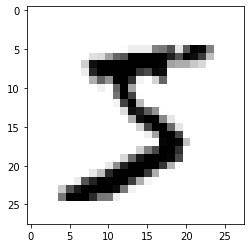

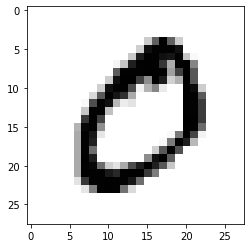

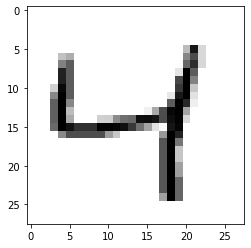

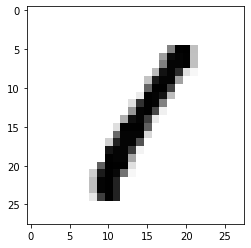

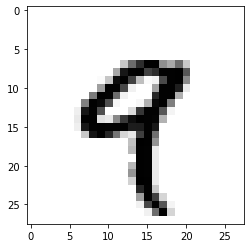

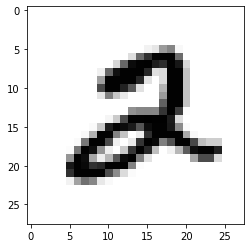

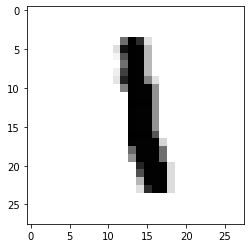

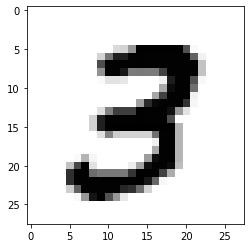

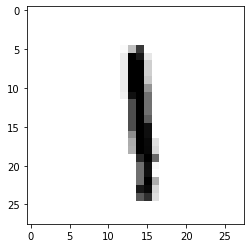

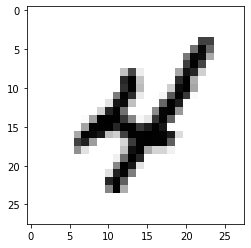

In [122]:
from matplotlib import pyplot as plt
%matplotlib inline
for i in range(0,10):
  plt.imshow(x_train[i],cmap='binary')
  plt.show()


Displaying labels

In [123]:
for i in range (0,10):
  print(y_train[i],end=" ")

5 0 4 1 9 2 1 3 1 4 

In [124]:
print(set(y_train))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


One-Hot Encoding.

In [125]:
from tensorflow.keras.utils import to_categorical

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [126]:
print("Lables: ")
print("Before encoding",y_train[0])
print("After encoding",y_train_onehot[0])

Lables: 
Before encoding 5
After encoding [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [127]:
print("Shape: ")
print("Before encoding",y_train.shape)
print("After encoding",y_train_onehot.shape)

Shape: 
Before encoding (60000,)
After encoding (60000, 10)


NEURAL NETWORK:

Reshaping the train data and test data into 1D array.
(28,28) is reshaped to (784,1)

In [128]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test,(10000,784))

print("Before Reshape:")
print("Training set",x_train.shape)
print("Testing set",x_test.shape)
print("After Reshape:")
print("Training set",x_train_reshaped.shape)
print("Testing set",x_test_reshaped.shape)

Before Reshape:
Training set (60000, 28, 28)
Testing set (10000, 28, 28)
After Reshape:
Training set (60000, 784)
Testing set (10000, 784)


Data Normalization

In [129]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
print(x_mean)
print(x_std)
print(x_train_reshaped)
epsilon = 1e-10

x_train_norm = (x_train_reshaped- x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

33.318421449829934
78.56748998339798
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [130]:
print("Before Normalization")
print(set(x_train_reshaped[0]))
print("After Normalization:")
print(set(x_train_norm[0]))

Before Normalization
{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}
After Normalization:
{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501

Creating Model

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
                   Dense(128, activation ='relu', input_shape=(784,)),
                   Dense(128, activation = 'relu'),
                   Dense(10, activation = 'softmax')     
                   ])

In [132]:
model.compile(
     optimizer = 'sgd',
     loss = 'categorical_crossentropy',
     metrics = ['accuracy']
)

Training the Model

In [133]:
model.fit(x_train_norm, y_train_onehot, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3618 - accuracy: 0.8953
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1843 - accuracy: 0.9461
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1391 - accuracy: 0.9596


Evaluating the model


In [134]:
(loss,accuracy) = model.evaluate(x_test_norm, y_test_onehot)
print("Testing Accuracy",accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.9631
Testing Accuracy 96.3100016117096


Predictions

In [135]:
preds = model.predict(x_test_norm)
print(y_test_onehot[0])
print(preds[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[1.9814803e-05 5.8903140e-07 3.6949603e-04 1.9508654e-04 1.6393847e-06
 5.2886030e-06 2.8847294e-08 9.9932146e-01 3.7904231e-06 8.2846811e-05]


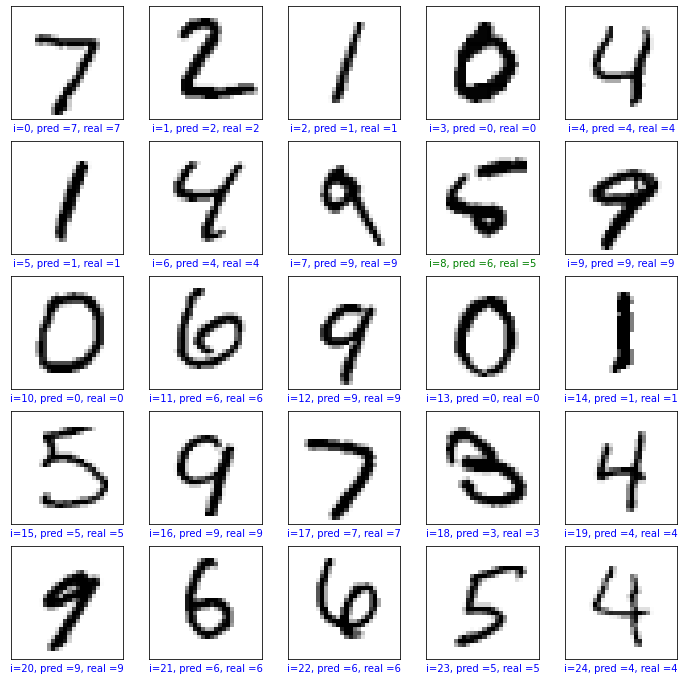

In [137]:
plt.figure(figsize=(12,12))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  pred = np.argmax([preds[i]])
  real = y_test[i]
  col = 'b'
  if(real!=pred):
    col = 'g'
  

  plt.xlabel("i={}, pred ={}, real ={}".format(i,pred,real),color = col)
  plt.imshow(x_test[i],cmap='binary')
plt.show()